# **Import Library and Getting location**

In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import json    as js # Loading json files
import numpy   as np # linear algebra
import pandas  as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/swiggy-restaurants-dataset/data.json
/kaggle/input/swiggy-restaurants-dataset/swiggy.csv


# **Loading Dataset**

## 1. CSV Dataset

In [40]:
df = pd.read_csv('/kaggle/input/swiggy-restaurants-dataset/swiggy.csv')
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [41]:
df.shape

(148541, 11)

## 2. JSON Dataset

In [42]:
fd   = open('/kaggle/input/swiggy-restaurants-dataset/data.json','r')
dct = js.loads(fd.read())
fd.close()

In [43]:
dct.keys()

dict_keys(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola', 'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Almora', 'Alwar', 'Amalapuram', 'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar', 'Anand', 'Anantapur', 'Angul', 'Ankleshwar', 'Arakkonam', 'Arambagh', 'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad', 'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra', 'Bagula', 'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore', 'Ballari', 'Balrampur', 'Balurghat', 'Banda', 'Bangalore', 'Bankabihar', 'Bankura', 'Bantwal', 'Bapatlachirala', 'Baramati', 'Baran', 'Baraut', 'Bardhaman', 'Bardoli', 'Bareilly', 'Baripada', 'Barmer', 'Barnala', 'Barshi', 'Barwani', 'Basirhat', 'Basti', 'Batala', 'Bathinda', 'Beawar', 'Beed', 'Begusarai', 'Bela-pratapgarh', 'Belgaum', 'Berhampore', 'Berhampur', 'Bettiah', 'Betul', 'Bhadohi', 'Bhadrachalam', 'Bhadrak', 'Bhadravati', 'Bhagalpur', 'Bhandara', 

# **Swiggy EDA And Visualisation**
## You need to find the important insights from Swiggy dataset as mentioned below

### 1. Find the top 10 most common restaurant name in India

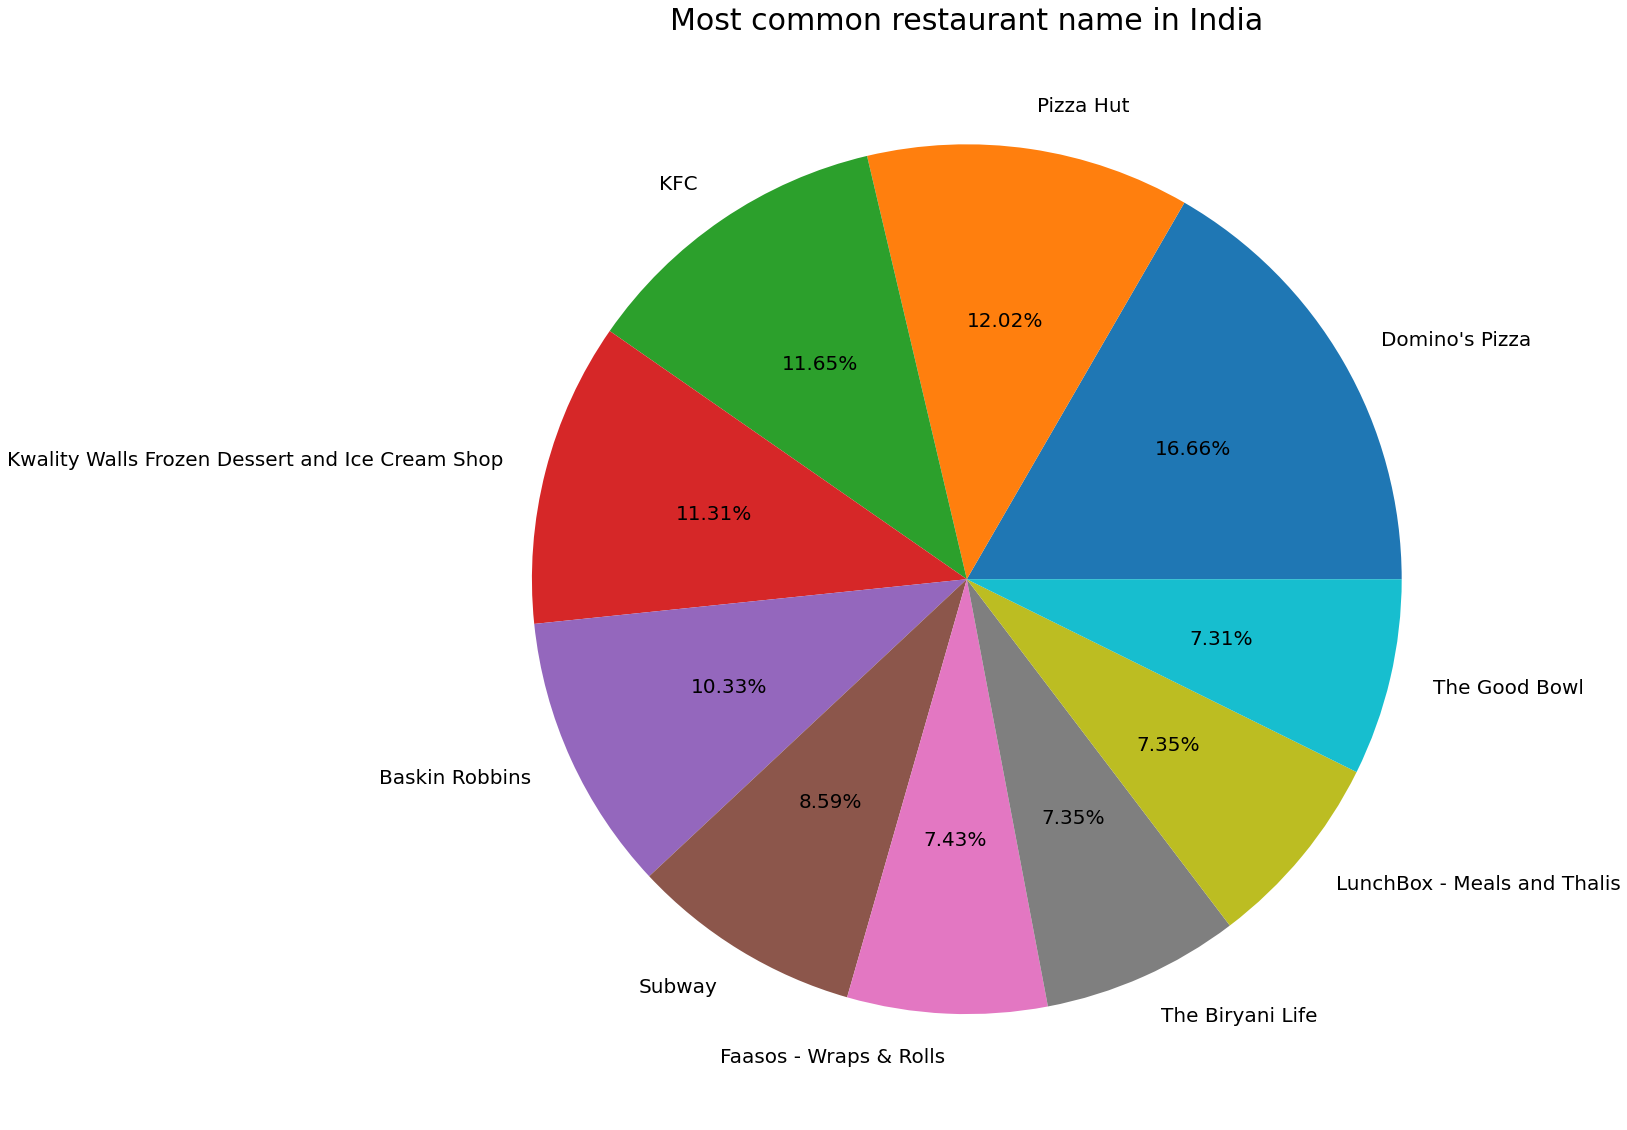

In [44]:
data = df.groupby('name').size().sort_values(ascending = False).head(10)

count = data.values
names  = data.index

def format(p,count):
    value = p/100 * sum(count)
    
    value += 1 if float('.'+str(value).split('.')[0]) > 0.5 else 0
    return f'{int(value)}'

plt.rc('font', **{'size':20})
plt.figure(figsize=(20,20))
plt.pie(count,labels = names,autopct = '%1.2f%%')

plt.title('Most common restaurant name in India', fontsize = 30 )
plt.show()


### 2. Find the top 10 most common restaurant name in Bangalore

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


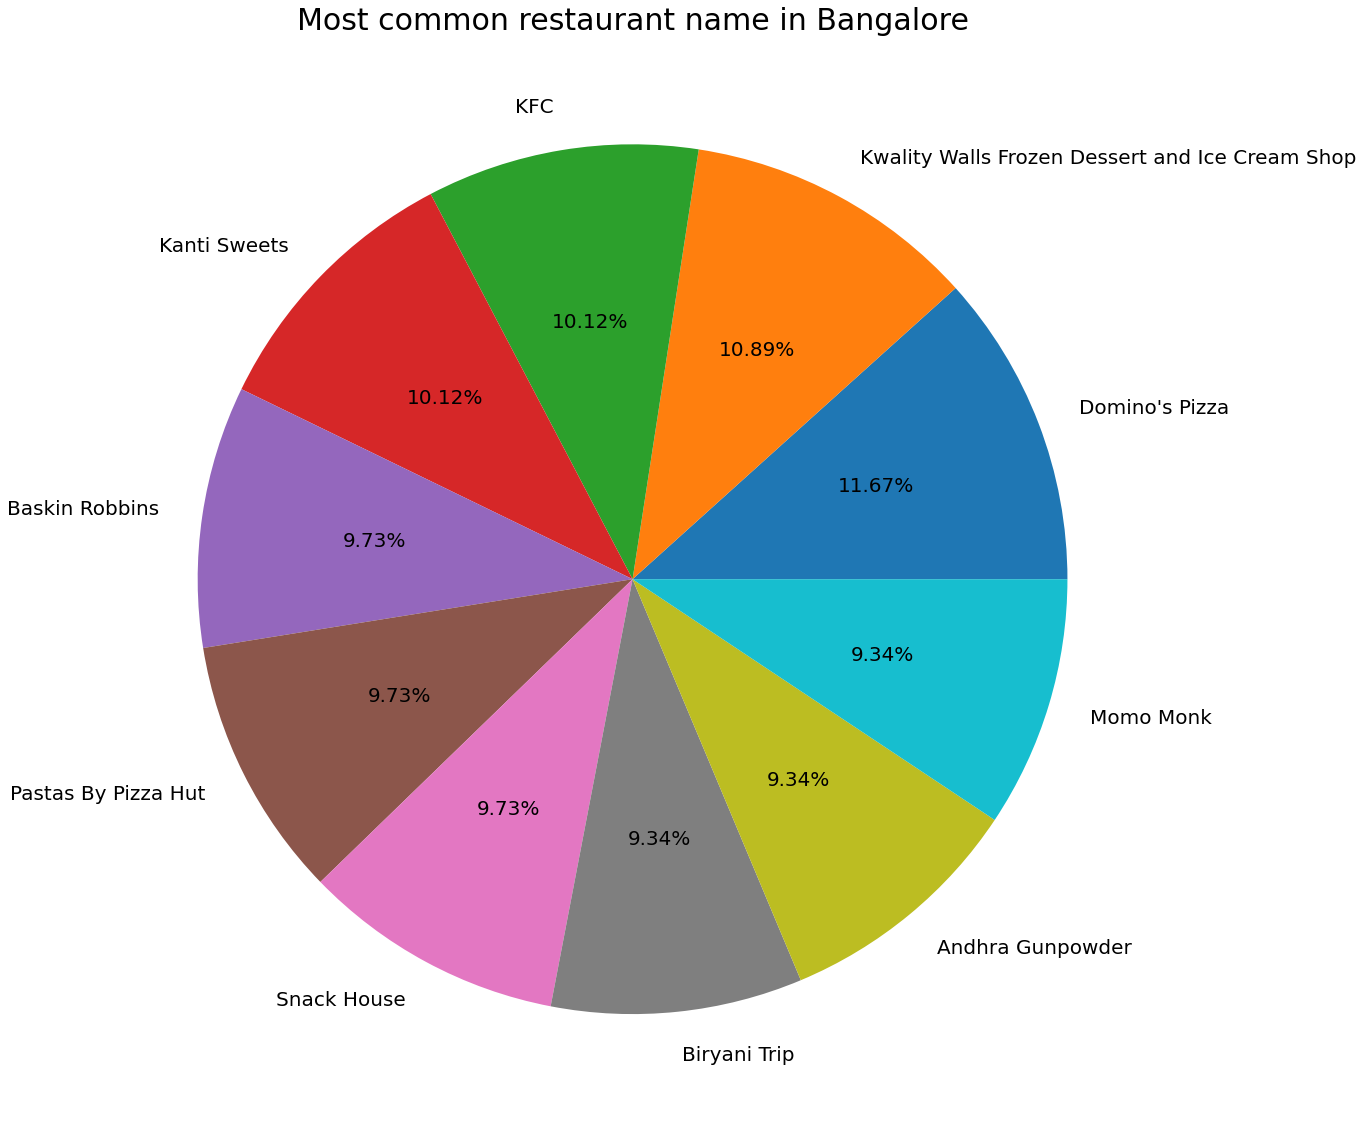

In [45]:
cities = [ i for i in df['city'].unique() if 'Bangalore' in i ]

data   = df[['name','city']]
data['include'] = data['city'].apply( lambda city : 1 if city in cities else 0)

data = data[data['include'] == 1]

data = data.groupby('name').size().sort_values(ascending = False).head(10)

count = data.values
names  = data.index

def format(p,count):
    value = p/100 * sum(count)
    
    value += 1 if float('.'+str(value).split('.')[0]) > 0.5 else 0
    return f'{int(value)}'

plt.rc('font', **{'size':20})
plt.figure(figsize=(20,20))
plt.pie(count,labels = names,autopct = '%1.2f%%')

plt.title('Most common restaurant name in Bangalore', fontsize = 30 )
plt.show()

### 3. How many branches of Dominos is there in the dataset

In [46]:
len(df[df['name'] == "Domino's Pizza"])

442

### 4. Compare the number of branches on KFC, MacD, Dominos and Subway (visualisation)

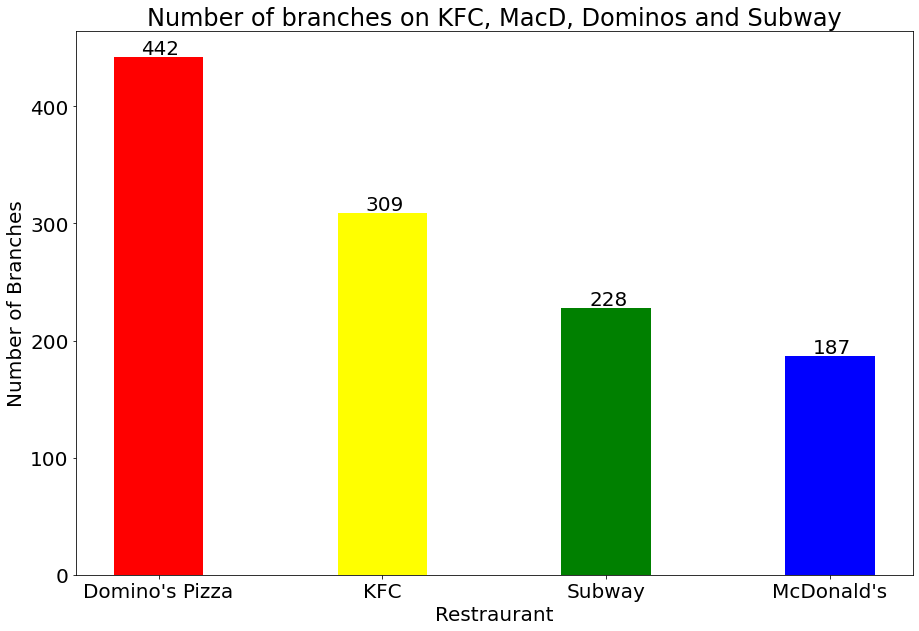

In [47]:
data = df.groupby('name').size()[["Domino's Pizza", "KFC", "McDonald's",'Subway']].sort_values(ascending = False)

x    = data.index
y    = data.values 


plt.figure(figsize = (15,10))

color = ['red','yellow','green','blue']

ax = plt.bar(x,y,width = 0.4,color = color)

for i in ax:

    x_ = i.xy[0] + i.get_width() / 2
    y_ = i.get_height()
    
    txt = str(y_)
    
    plt.annotate(
        text       = txt,
        xy         = (x_,y_),
        xytext     = (-17,2.9),
        textcoords = 'offset points'
    )

plt.xlabel('Restraurant')
plt.ylabel('Number of Branches')
plt.title('Number of branches on KFC, MacD, Dominos and Subway')
plt.show()

### 5. Top 10 Most popular cuisines in terms of number of restaurants serving (visualisation)

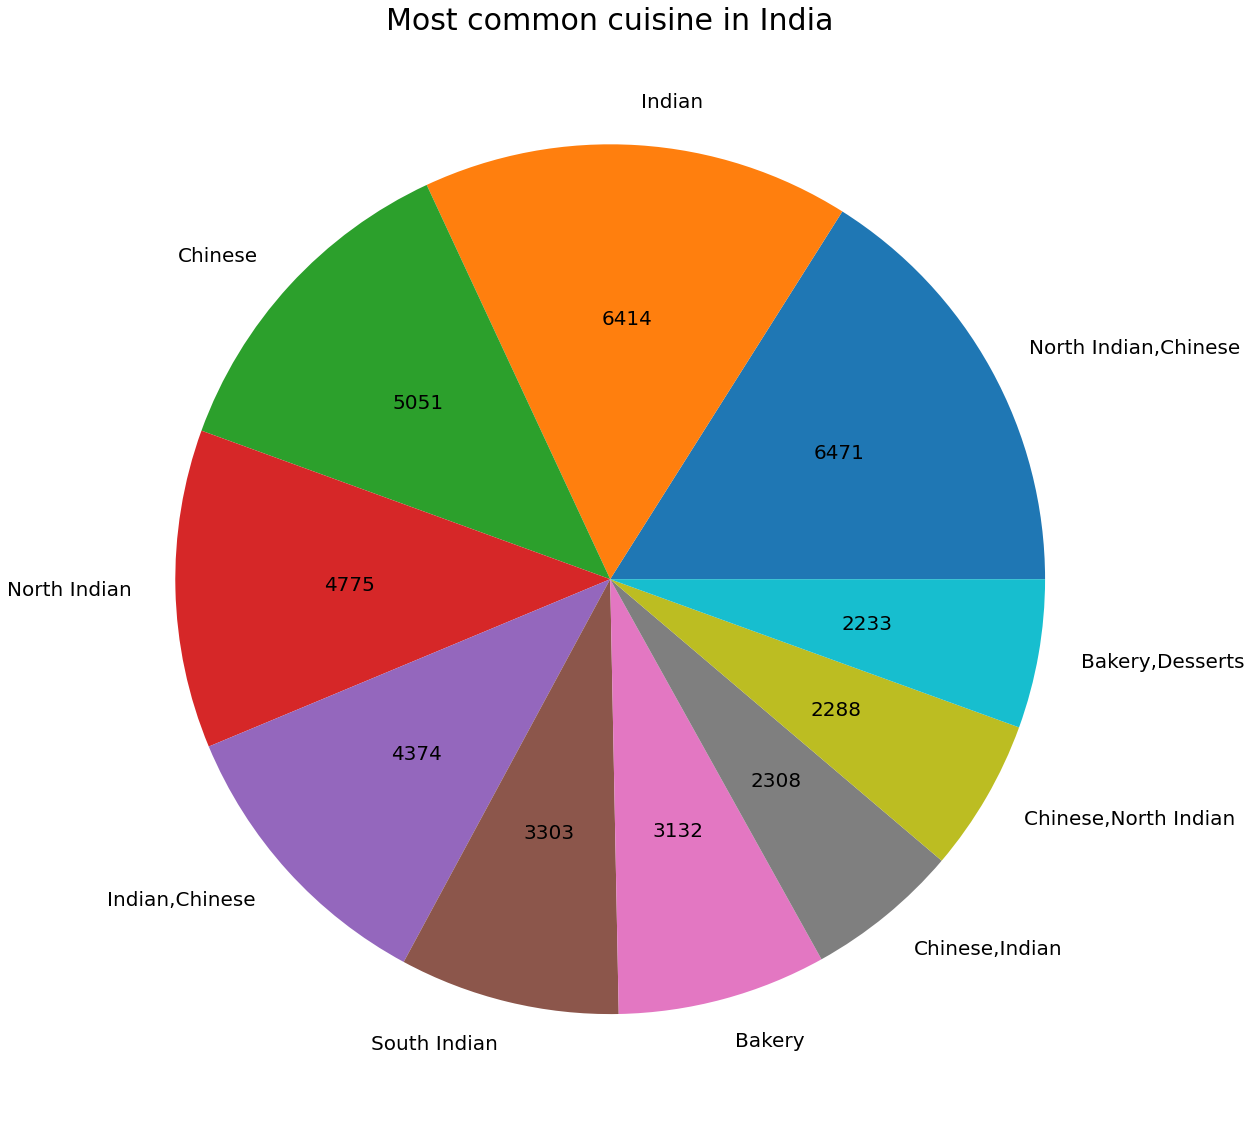

In [48]:
data = df.groupby('cuisine').size().sort_values(ascending = False).head(10)

count = data.values
names  = data.index

def format(p,count):
    value = p/100 * sum(count)
    
    value += 1 if float('.'+str(value).split('.')[-1]) > 0.5 else 0
    return f'{int(value)}'

plt.rc('font', **{'size':20})
plt.figure(figsize=(20,20))
plt.pie(count,labels = names,autopct = lambda p : format(p,count))

plt.title('Most common cuisine in India', fontsize = 30 )
plt.show()

### 6. What is the ratio of veg and nonveg restaurants in India (NonVeg) means even if one of the item in menu is NonVeg and Veg means pure (Veg Restaurants)

In [49]:
category = {}
for city in dct.values():

    if len(city) == 2:

        for restaurant in city['restaurants'].values():

            if len(restaurant) != 5:

                for menus in restaurant['menu'].values():

                    for menu in menus.values():

                        val = menu['veg_or_non_veg']
                        category[val] = category.get(val,0) + 1       # counting Veg and Non Veg 
    else: 
        for subcity in city.values():

            for restaurant in subcity['restaurants'].values():

                if len(restaurant) != 5:

                    for menus in restaurant['menu'].values():

                        for menu in menus.values():

                            val = menu['veg_or_non_veg']
                            category[val] = category.get(val,0) + 1  # counting Veg and Non Veg 

answer = int(category['Veg'] / category['Non-veg'])

print(answer,'is the ratio of veg and nonveg restaurants in India (NonVeg) means even if one of the item in menu is NonVeg and Veg means pure (Veg Restaurants)')

2 is the ratio of veg and nonveg restaurants in India (NonVeg) means even if one of the item in menu is NonVeg and Veg means pure (Veg Restaurants)
